In [1]:
# Cell 1 - imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("mortality_log.csv", parse_dates=["timestamp"])
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [3]:
df.head

<bound method NDFrame.head of               timestamp  death_count  healthy_count
0   2025-09-30 16:29:10            0              1
1   2025-09-30 16:29:11            0              1
2   2025-09-30 16:29:12            0              1
3   2025-09-30 16:29:14            0              1
4   2025-09-30 16:29:28            0              1
..                  ...          ...            ...
368 2025-09-30 16:40:19            0              1
369 2025-09-30 16:40:20            0              1
370 2025-09-30 16:40:20            0              1
371 2025-09-30 16:40:21            0              1
372 2025-09-30 16:40:22            0              1

[373 rows x 3 columns]>

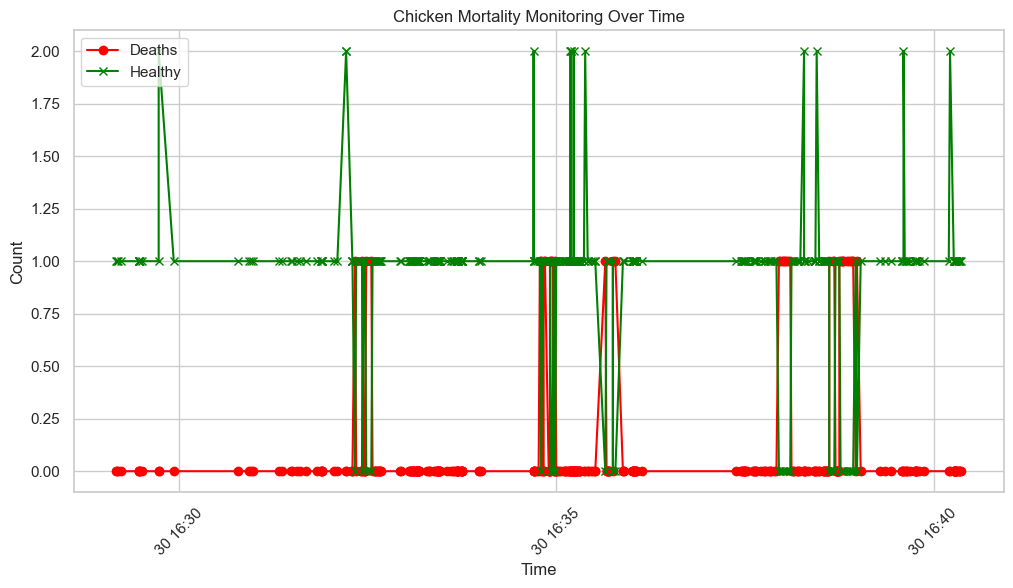

In [4]:
# Line plot: deaths & healthy
plt.plot(df["timestamp"], df["death_count"], label="Deaths", color="red", marker="o") 
plt.plot(df["timestamp"], df["healthy_count"], label="Healthy", color="green", marker="x") 
plt.title("Chicken Mortality Monitoring Over Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

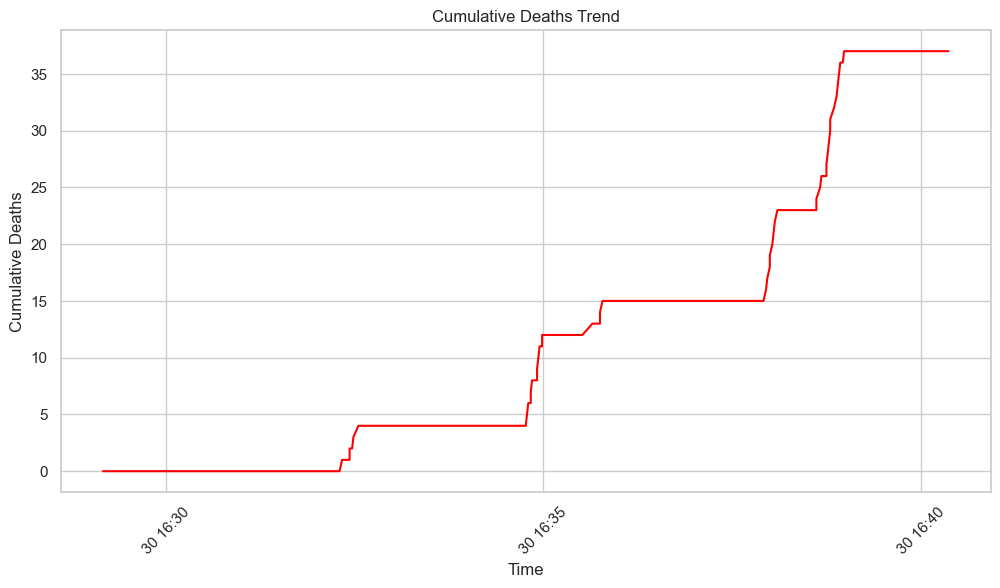

In [5]:
# Cumulative deaths
df["cumulative_deaths"] = df["death_count"].cumsum()
plt.plot(df["timestamp"], df["cumulative_deaths"], color="red") 
plt.title("Cumulative Deaths Trend")
plt.xlabel("Time")
plt.ylabel("Cumulative Deaths") 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

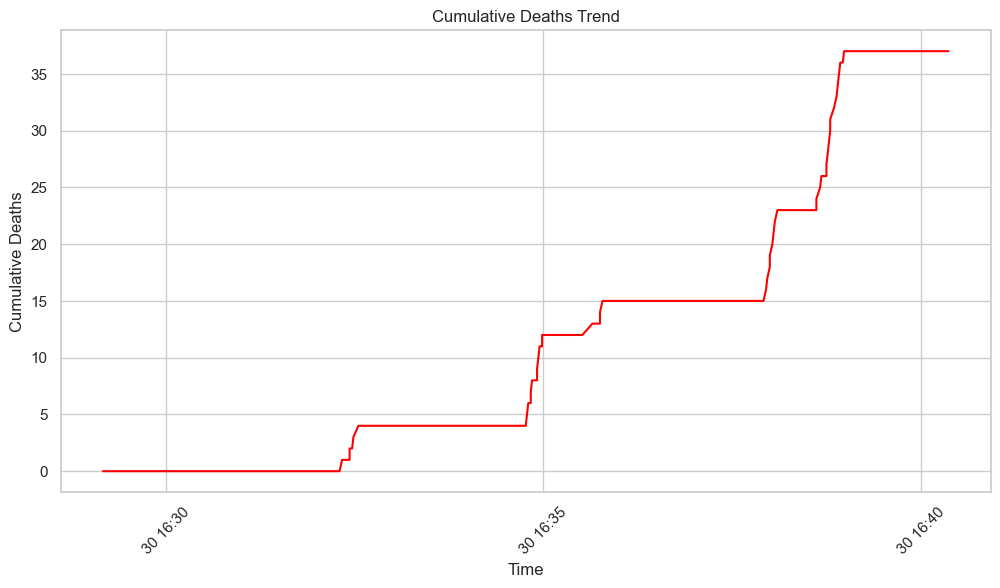

In [6]:
# Cumulative deaths
df["cumulative_deaths"] = df["death_count"].cumsum()
plt.plot(df["timestamp"], df["cumulative_deaths"], color="red") 
plt.title("Cumulative Deaths Trend")
plt.xlabel("Time")
plt.ylabel("Cumulative Deaths") 
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

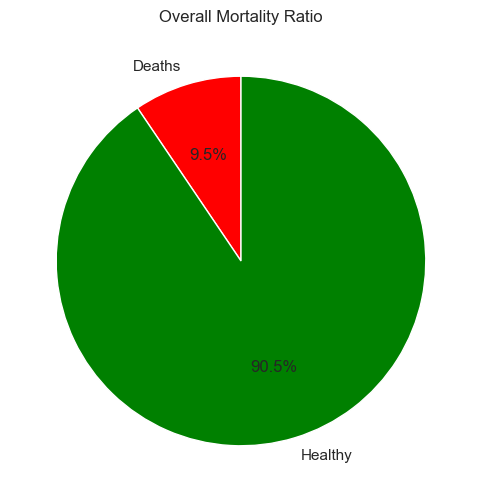

In [7]:
# Pie chart: overall mortality ratio
total_deaths = df["death_count"].sum()
total_healthy = df["healthy_count"].sum()
plt.pie([total_deaths, total_healthy], labels=["Deaths", "Healthy"], autopct='%1.1f%%', colors=["red", "green"], startangle=90) 
plt.title("Overall Mortality Ratio") 
plt.show()

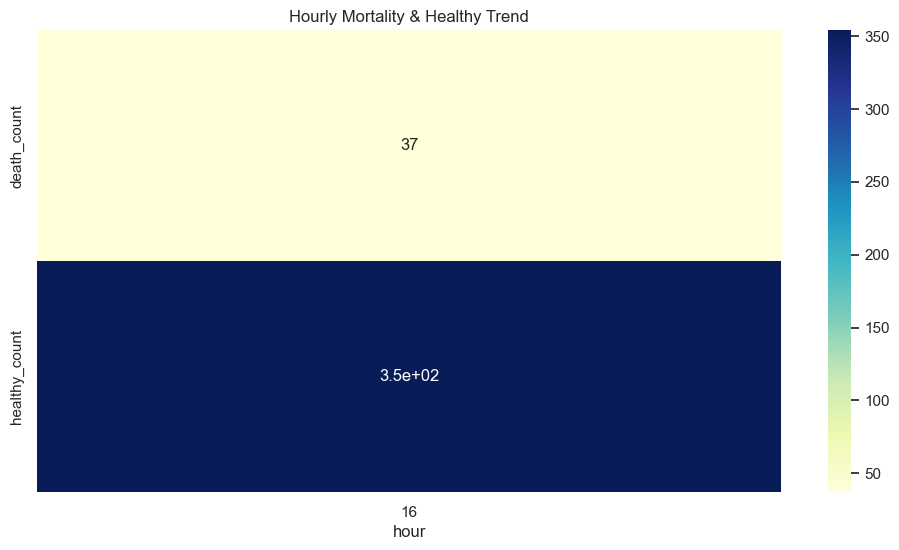

In [8]:

# Optional: hourly trend heatmap
df["hour"] = df["timestamp"].dt.hour
hourly_trend = df.groupby("hour")[["death_count","healthy_count"]].sum()
sns.heatmap(hourly_trend.T, annot=True, cmap="YlGnBu")
plt.title("Hourly Mortality & Healthy Trend")
plt.show()
